In [1]:
import numba

import datetime
import pandas as pd
import numpy as np
#import pandas_profiling
import sys
import os

import time
from datetime import date
from datetime import timedelta
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
import sklearn.metrics
from random import randrange
from itertools import chain
import random

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

C:\Users\ivan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\ivan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ivan\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv('HORSE_DATA_MOD.csv')
#df = pd.concat([df,pd.get_dummies(df.HORSE_RESULT)], axis = 1)

C:\Users\ivan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (547) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols = ['ADJUSTED_RATING', 'AGE', 'AMT_BACKED_10_MINS_OUT', 'AMT_BACKED_1_MIN_OUT', 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT', 'AMT_BACKED_30_MINS_OUT', 'AMT_BACKED_40_MINS_OUT', 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT', 'AMT_BACKED_60_MINS_OUT', 'BACKPRICE', 'DAYS_SINCE_LAST_RUN', 'EXPERIENCE', 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR', 'FORECASTPRICE_NUMERATOR', 'HANDICAP', 'HORSE_RANKING_BY_PRICE', 'HORSE_RESULT', 'JOCKEY_CLAIM',
 'LASTPRICETRADED', 'LOSER', 'NUMBEROFACTIVERUNNERS', 'NUMBEROFRUNNERS', 'OFFICIAL_RATING', 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING', 'PRICE_10_MINS_OUT', 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT', 'PRICE_1_MIN_OUT_RANKING', 'PRICE_20_MINS_OUT', 'PRICE_20_MINS_OUT_RANKING', 'PRICE_2_SECS_OUT',
 'PRICE_2_SECS_OUT_RANKING', 'PRICE_30_MINS_OUT', 'PRICE_30_MINS_OUT_RANKING', 'PRICE_40_MINS_OUT', 'PRICE_40_MINS_OUT_RANKING',
 'PRICE_45_MINS_OUT', 'PRICE_45_MINS_OUT_RANKING', 'PRICE_5_MINS_OUT', 'PRICE_5_MINS_OUT_RANKING', 'PRICE_60_MINS_OUT',
 'PRICE_60_MINS_OUT_RANKING', 'PRICE_MOVEMENT_SIGNIFICANCE', 'PRICE_RANKING_AT_RACE_START', 'PRODUCT_OF_ALL_RANKINGS',
 'PROD_OF_ALL_RANKINGS_RANKING', 'PROD_OF_NUM_SAMPLES_RANKINGS', 'PROD_SAMPLES_RANKINGS_RANKING', 'PROPENSITY',
 'PROPENSITY_RANKING', 'RACE_DISTANCE', 'REMOVED', 'SCORE_OF_RANKINGS', 'SCORE_OF_RANKINGS_RANKING', 'SECOND_LAST_RACE',
 'SEX_TYPE', 'SORT_PRIORITY', 'STALL_DRAW', 'SUM_OF_ALL_RANKINGS', 'SUM_OF_ALL_RANKINGS_RANKING',
 'SUM_OF_NUM_SAMPLES_RANKINGS', 'SUM_SAMPLES_RANKINGS_RANKING', 'TOTALAVAILABLE', 'TOTAL_MATCHED_ON_RACE',
 'TOTAL_MATCHED_ON_RUNNER', 'TOTAL_WLR', 'TRAINER_NAME', 'WEARING', 'WEIGHT_VALUE', 'WINNER',
 'WLR_RANKING', 'WLR_RANKINGS_RANKING', 'WLR_RANKINGS_TOTAL', 'BACKPRICE_NORM', 'AMT_BACKED_10_MINS_OUT_NORM',
 'AMT_BACKED_1_MIN_OUT_NORM', 'AMT_BACKED_20_MINS_OUT_NORM', 'AMT_BACKED_2_SECS_OUT_NORM', 'AMT_BACKED_30_MINS_OUT_NORM', 
 'AMT_BACKED_40_MINS_OUT_NORM', 'AMT_BACKED_45_MINS_OUT_NORM', 'AMT_BACKED_5_MINS_OUT_NORM', 'AMT_BACKED_60_MINS_OUT_NORM',
        'PRICE_10_MINS_OUT_NORM',\
             'PRICE_1_MIN_OUT_NORM',\
             'PRICE_20_MINS_OUT_NORM',\
             'PRICE_2_SECS_OUT_NORM',\
             'PRICE_30_MINS_OUT_NORM',\
             'PRICE_40_MINS_OUT_NORM',\
             'PRICE_45_MINS_OUT_NORM',\
             'PRICE_5_MINS_OUT_NORM',\
             'PRICE_60_MINS_OUT_NORM']

In [4]:
#corrs = df[cols][df[cols].columns[1:]].corr()['WINNER'][:]
#corrs.sort_values(ascending=False)
#corr_feat = abs(corrs).sort_values(ascending=False)

In [5]:
cols.remove('WINNER')
cols.remove('HORSE_RESULT')
cols.remove('PROD_OF_NUM_SAMPLES_RANKINGS')
cols.remove('SECOND_LAST_RACE')
cols.remove('SEX_TYPE')
cols.remove('TRAINER_NAME')
cols.remove('WEARING')
cols.remove('LOSER')
cols.remove('REMOVED')
#cols.remove('HORSE_RESULT')

In [6]:
#df[cols].dtypes

In [7]:
df = df.replace([np.inf, -np.inf], np.nan)

In [8]:
for p in cols:
    df[p].fillna(0,inplace=True)

In [9]:
cols

['ADJUSTED_RATING',
 'AGE',
 'AMT_BACKED_10_MINS_OUT',
 'AMT_BACKED_1_MIN_OUT',
 'AMT_BACKED_20_MINS_OUT',
 'AMT_BACKED_2_SECS_OUT',
 'AMT_BACKED_30_MINS_OUT',
 'AMT_BACKED_40_MINS_OUT',
 'AMT_BACKED_45_MINS_OUT',
 'AMT_BACKED_5_MINS_OUT',
 'AMT_BACKED_60_MINS_OUT',
 'BACKPRICE',
 'DAYS_SINCE_LAST_RUN',
 'EXPERIENCE',
 'EXPERIENCE_RANKING',
 'FORECASTPRICE_DENOMINATOR',
 'FORECASTPRICE_NUMERATOR',
 'HANDICAP',
 'HORSE_RANKING_BY_PRICE',
 'JOCKEY_CLAIM',
 'LASTPRICETRADED',
 'NUMBEROFACTIVERUNNERS',
 'NUMBEROFRUNNERS',
 'OFFICIAL_RATING',
 'OFFICIAL_RATING_RANKING',
 'PMS_RANKING',
 'PRICE_10_MINS_OUT',
 'PRICE_10_MINS_OUT_RANKING',
 'PRICE_1_MIN_OUT',
 'PRICE_1_MIN_OUT_RANKING',
 'PRICE_20_MINS_OUT',
 'PRICE_20_MINS_OUT_RANKING',
 'PRICE_2_SECS_OUT',
 'PRICE_2_SECS_OUT_RANKING',
 'PRICE_30_MINS_OUT',
 'PRICE_30_MINS_OUT_RANKING',
 'PRICE_40_MINS_OUT',
 'PRICE_40_MINS_OUT_RANKING',
 'PRICE_45_MINS_OUT',
 'PRICE_45_MINS_OUT_RANKING',
 'PRICE_5_MINS_OUT',
 'PRICE_5_MINS_OUT_RANKING',
 'PR

In [10]:
#df1 = df.sample(frac = 0.1)

X_train, X_test, y_train, y_test = train_test_split(df[cols], df.WINNER, test_size=0.4)

In [11]:
len(X_train)

78994

In [19]:
#min_child_weight = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 6)]
#gamma = [int(x) for x in np.linspace(start = 5, stop = 200, num = 6)]
#subsample = [int(x) for x in np.linspace(start = 5, stop = 200, num = 6)]
#colsample_bytree = ['auto']
#max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]
#max_depth.append(None)
#learning_rate = [True, False]

# Create the random grid
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [1, 1.5, 2, 5, 8],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.02, 0.05]    
        }

pprint(params)

{'colsample_bytree': [0.8, 0.9, 1.0],
 'gamma': [1, 1.5, 2, 5, 8],
 'learning_rate': [0.01, 0.02, 0.05],
 'max_depth': [3, 5, 7, 10],
 'min_child_weight': [1, 5, 10],
 'subsample': [0.8, 0.9, 1.0]}


In [ ]:
folds = 3
param_comb = 50

now = time.time()

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001)

random_search.fit(X_train, y_train)

elapsed_time = int(time.time() - now)
print (elapsed_time)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 32.2min


In [ ]:
random_search.best_params_

In [ ]:
grid_predictions = random_search.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(df[cols], df.WINNER, test_size=0.2)

In [26]:
result_A = X_test[[]].copy(True)

result_A['RF_Prob'] = random_search.predict_proba(X_test[cols])[:,1]#*(3**0.35)

probs = pd.merge(result_A,
                 y_test.to_frame(),
                 left_index=True,right_index=True,how='inner').fillna(0)

probs = pd.merge(probs,X_test['BACKPRICE'].to_frame(),\
                 left_index=True,right_index=True,how='inner').fillna(0)

probs = pd.merge(probs,df['LOSER'].to_frame(),\
                 left_index=True,right_index=True,how='inner').fillna(0)

probs.head(10)

,RF_Prob,WINNER,BACKPRICE,LOSER
37969,0.009173,0,100.0,1
117580,0.167974,0,7.6,1
106009,0.010340,0,1000.0,1
50594,0.043410,0,22.0,1
75186,0.009719,0,95.0,0
101325,0.009609,0,75.0,1
121456,0.049782,0,22.0,1
130834,0.132236,0,8.6,1
68914,0.027931,0,28.0,1
105863,0.041418,0,50.0,1


In [ ]:
probs['induced_odds_BPRICE'] = 1/probs.BACKPRICE

a = 0.5
b = 1-a

probs['comb_prob'] = (a*probs.RF_Prob) + (b*probs.induced_odds_BPRICE)

probs['odds_diff'] = (probs.RF_Prob) - (probs.induced_odds_BPRICE)

probs['odds_diff_1'] = (probs.comb_prob) - (probs.induced_odds_BPRICE)

In [27]:
win_prob_list = []
horse_count_list = []
T_list = []
backprice_list = []


n = (probs['RF_Prob'].max() - probs['RF_Prob'].min())/50
for T in np.linspace(probs['RF_Prob'].min(), probs['RF_Prob'].max(), 50):
    
    horse_count = len(probs[(probs['RF_Prob'] >= T) & (probs['RF_Prob'] < T + n)])
    horse_count_list.append(horse_count)
    
    win_prob_list.append((probs[(probs['RF_Prob'] >= T) & (probs['RF_Prob'] < T+n)].WINNER.sum())/horse_count)
    
    backprice_list.append(probs[(probs['RF_Prob'] >= T) &\
                                (probs['RF_Prob'] < T+n)].BACKPRICE.mean())


    T_list.append(T)

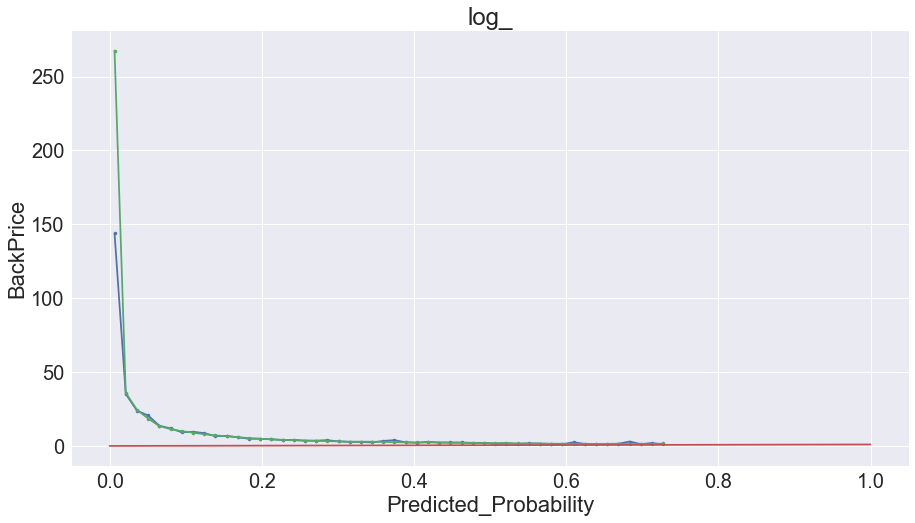

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(1,win_prob_list),   '.-')
ax.plot(T_list, backprice_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("BackPrice")
_ = plt.plot([0, 1], [0, 1])
plt.title('log_')

plt.xlim(-0.05,1.05)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

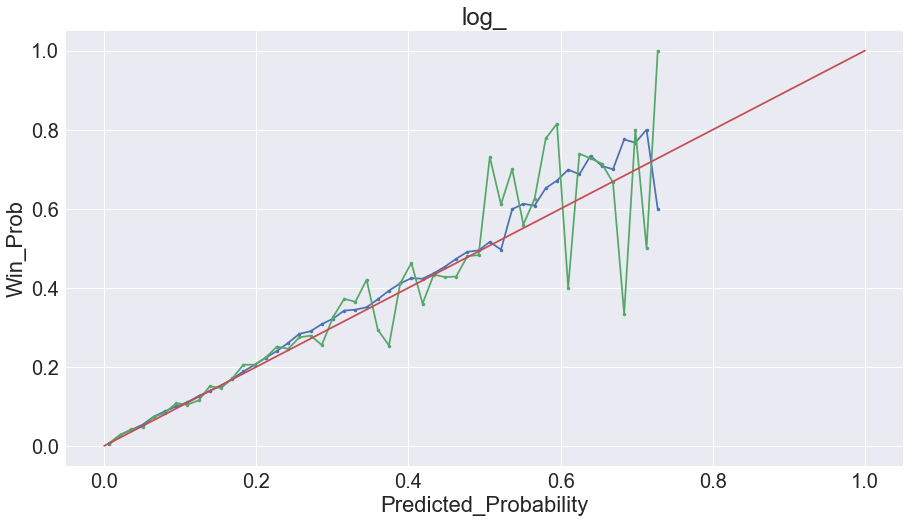

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(1,backprice_list),   '.-')
ax.plot(T_list, win_prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Win_Prob")
_ = plt.plot([0, 1], [0, 1])
plt.title('log_')

plt.xlim(-0.05,1.05)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

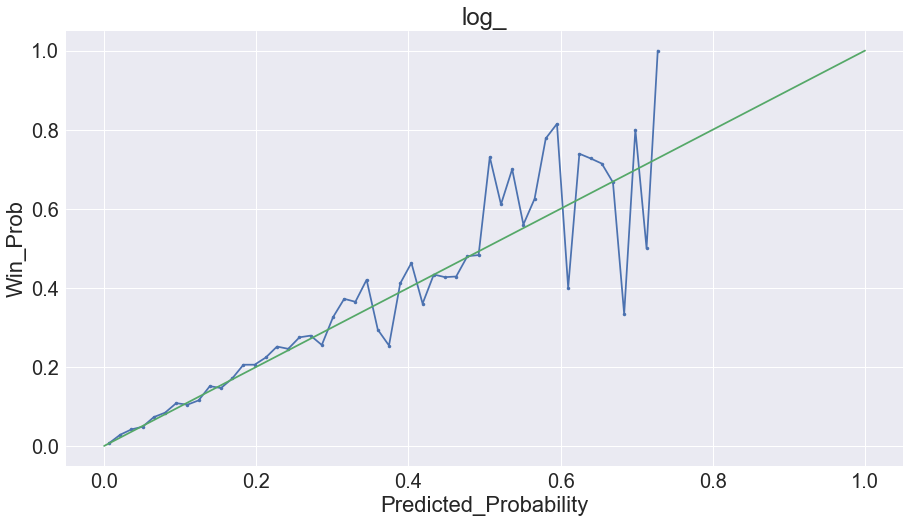

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, win_prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Win_Prob")
_ = plt.plot([0, 1], [0, 1])
plt.title('log_')

plt.xlim(-0.05,1.05)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

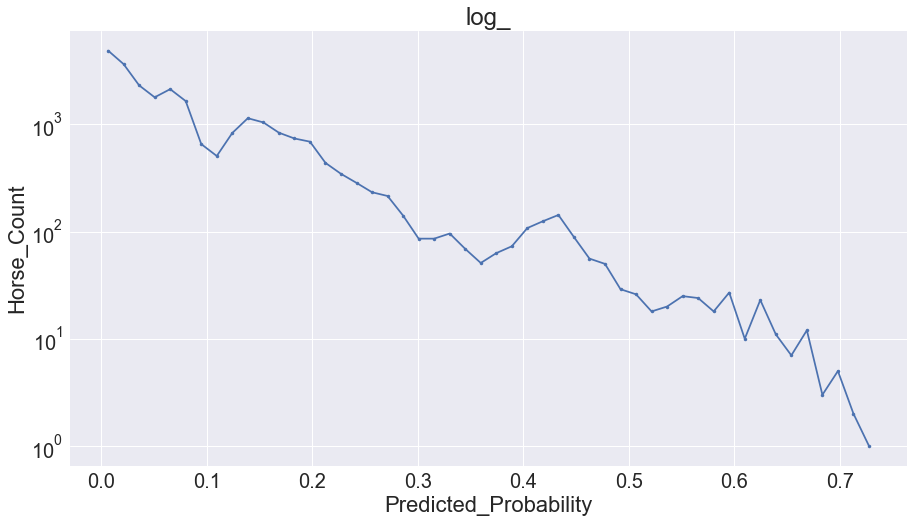

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Horse_Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

plt.xlim(-0.05,1.05)
#plt.ylim(0,3000)
plt.yscale('log')

plt.grid(True)
plt.show()

In [57]:
TRAIN_SET = X_train[[]].copy(True)

TRAIN_SET['RF_Prob'] = random_search.predict_proba(X_train[cols])[:,1]#*(3**0.35)

TRAIN_SET = pd.merge(TRAIN_SET,
                 y_train.to_frame(),
                 left_index=True,right_index=True,how='inner').fillna(0)

TRAIN_SET = pd.merge(TRAIN_SET,X_train['BACKPRICE'].to_frame(),\
                 left_index=True,right_index=True,how='inner').fillna(0)

TRAIN_SET = pd.merge(TRAIN_SET,df['LOSER'].to_frame(),\
                 left_index=True,right_index=True,how='inner').fillna(0)

TRAIN_SET['induced_odds_BPRICE'] = 1/TRAIN_SET.BACKPRICE

a = 0.5
b = 1-a

TRAIN_SET['comb_prob'] = (a*TRAIN_SET.RF_Prob) + (b*TRAIN_SET.induced_odds_BPRICE)

TRAIN_SET['odds_diff'] = (TRAIN_SET.RF_Prob) - (TRAIN_SET.induced_odds_BPRICE)

TRAIN_SET['odds_diff_1'] = (TRAIN_SET.comb_prob) - (TRAIN_SET.induced_odds_BPRICE)

In [58]:
win_prob_list = []
horse_count_list = []
T_list = []
backprice_list = []


n = (TRAIN_SET['odds_diff'].max() - TRAIN_SET['odds_diff'].min())/50
for T in np.linspace(TRAIN_SET['odds_diff'].min(), TRAIN_SET['odds_diff'].max(), 50):
    
    horse_count = len(TRAIN_SET[(TRAIN_SET['odds_diff'] >= T) & (TRAIN_SET['odds_diff'] < T + n)])
    horse_count_list.append(horse_count)
    
    win_prob_list.append((TRAIN_SET[(TRAIN_SET['odds_diff'] >= T) & (TRAIN_SET['odds_diff'] < T+n)].WINNER.sum())/horse_count)
    
    backprice_list.append(TRAIN_SET[(TRAIN_SET['odds_diff'] >= T) &\
                                (TRAIN_SET['odds_diff'] < T+n)].BACKPRICE.mean())


    T_list.append(T)

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


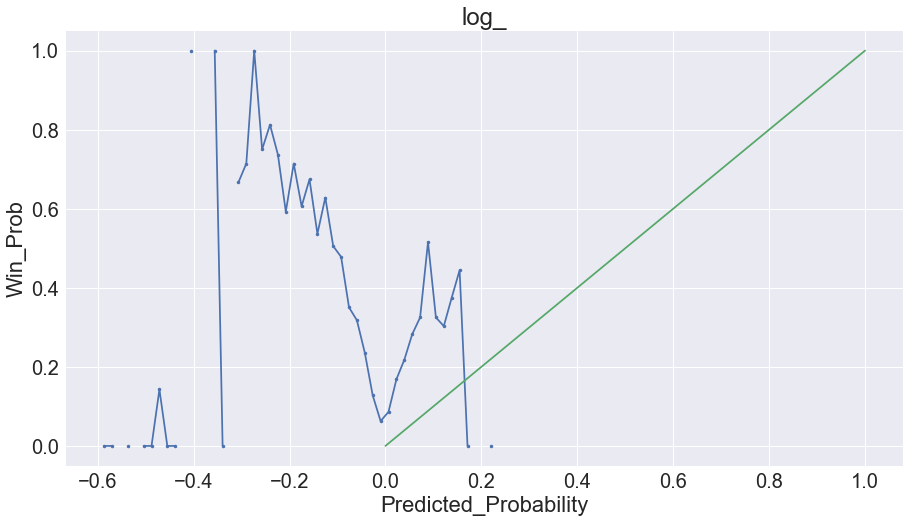

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
#ax.plot(T_list, np.divide(1,backprice_list),   '.-')
ax.plot(T_list, win_prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Pred_Pred - Induced_Odds")
plt.ylabel("Win_Prob")
_ = plt.plot([0, 1], [0, 1])
plt.title('log_')

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

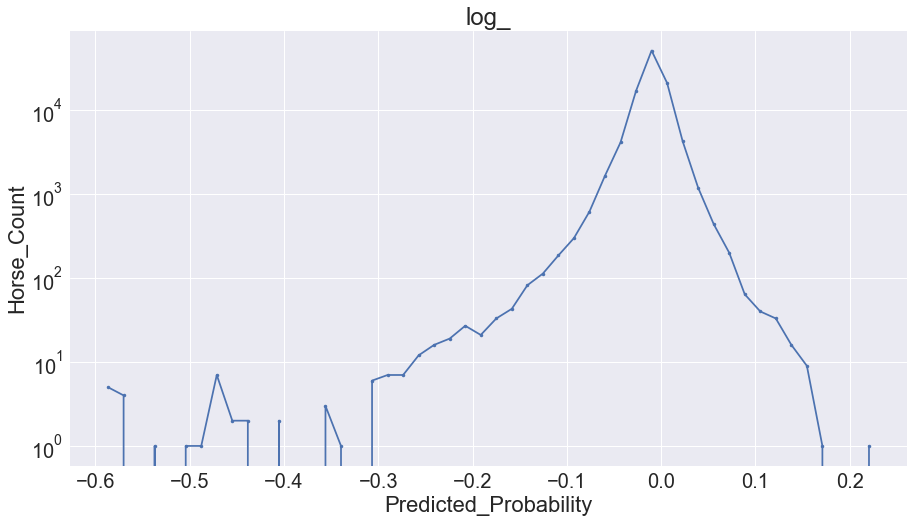

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Pred_Pred - Induced_Odds")
plt.ylabel("Horse_Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

#plt.xlim(-800,500)
#plt.ylim(0,3000)
plt.yscale('log')

plt.grid(True)
plt.show()

In [78]:
horse_count_list = []
T_list = []
EV_list0 = []


n = (TRAIN_SET['odds_diff'].max() - TRAIN_SET['odds_diff'].min())/200
for T in np.linspace(TRAIN_SET['odds_diff'].min(), TRAIN_SET['odds_diff'].max(), 400):
    
    horse_count = len(TRAIN_SET[(TRAIN_SET['odds_diff'] >= T) & (TRAIN_SET['odds_diff'] < T + n)])
    #horse_count_list.append(horse_count)
    
    win_prob = (TRAIN_SET[(TRAIN_SET['odds_diff'] >= T) & (TRAIN_SET['odds_diff'] < T+n)].WINNER.sum())/horse_count
    
    reward_list0 = []
    df1 = TRAIN_SET[(TRAIN_SET['odds_diff'] >= T) & (TRAIN_SET['odds_diff'] < T + n) & (df.BACKPRICE < 1/win_prob)]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list0.append(reward)
    horse_count_list.append(len(df1))
    EV_list0.append(np.sum(reward_list0))
    T_list.append(T)

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to 

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

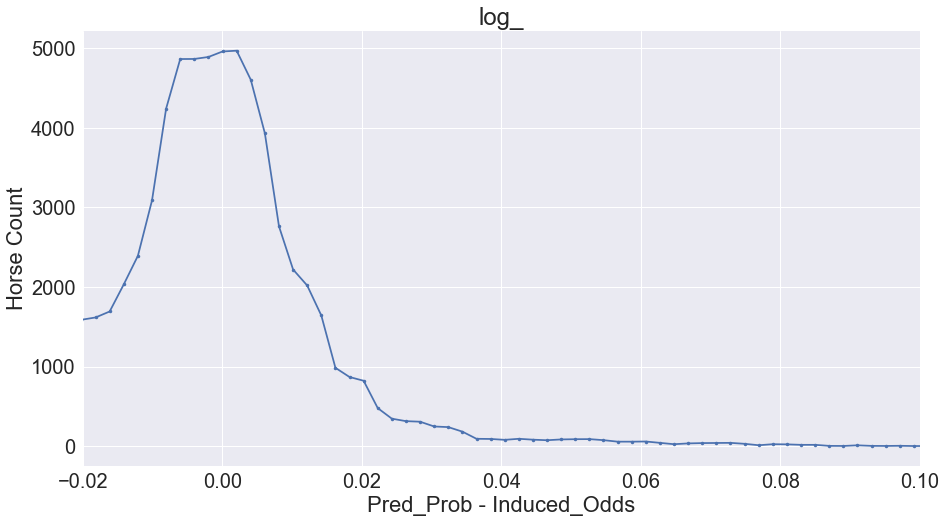

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Pred_Prob - Induced_Odds")
plt.ylabel("Horse Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

plt.xlim(-0.02,0.1)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

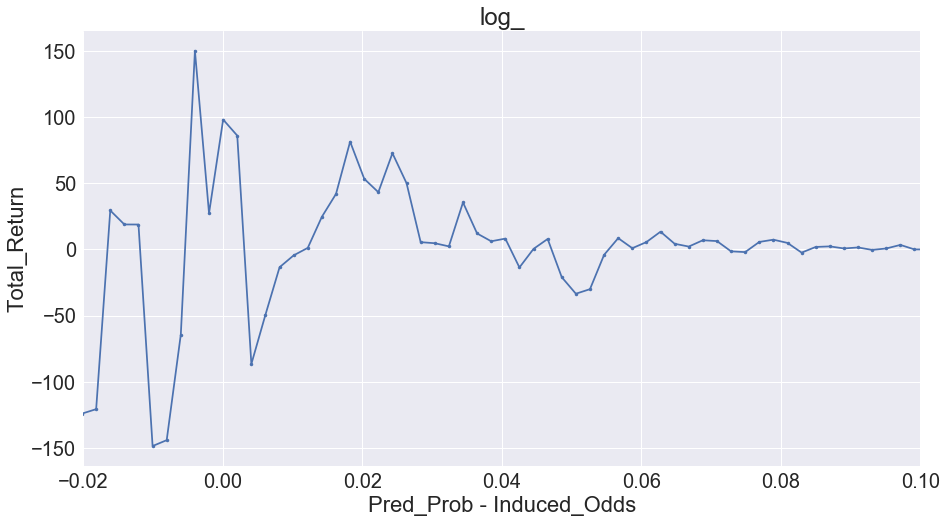

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, (EV_list0),   '.-')
plt.rc('font', size=28)
plt.xlabel("Pred_Prob - Induced_Odds")
plt.ylabel("Total_Return")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

plt.xlim(-0.02,0.1)
#plt.ylim(-500,50)

plt.grid(True)
plt.show()

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


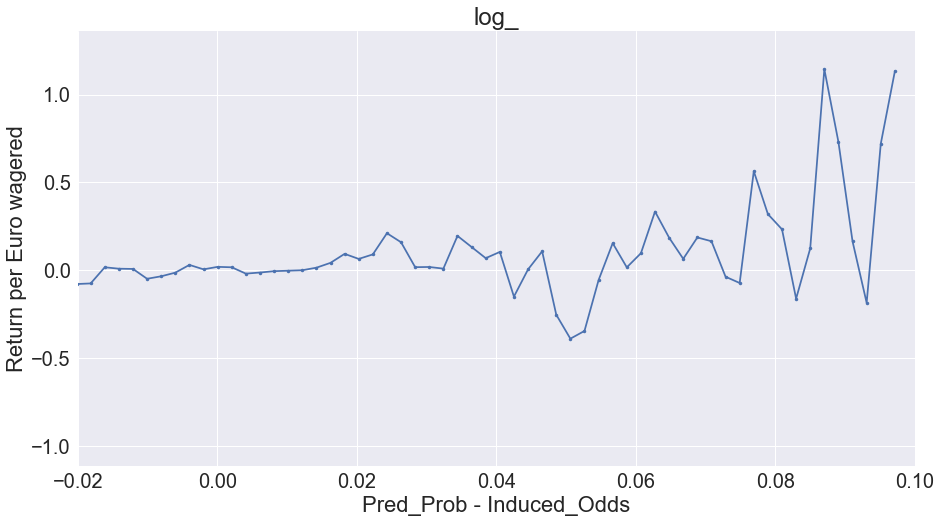

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(EV_list0, horse_count_list),   '.-')
plt.rc('font', size=28)
plt.xlabel("Pred_Prob - Induced_Odds")
plt.ylabel("Return per Euro wagered")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

plt.xlim(-0.02,0.1)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

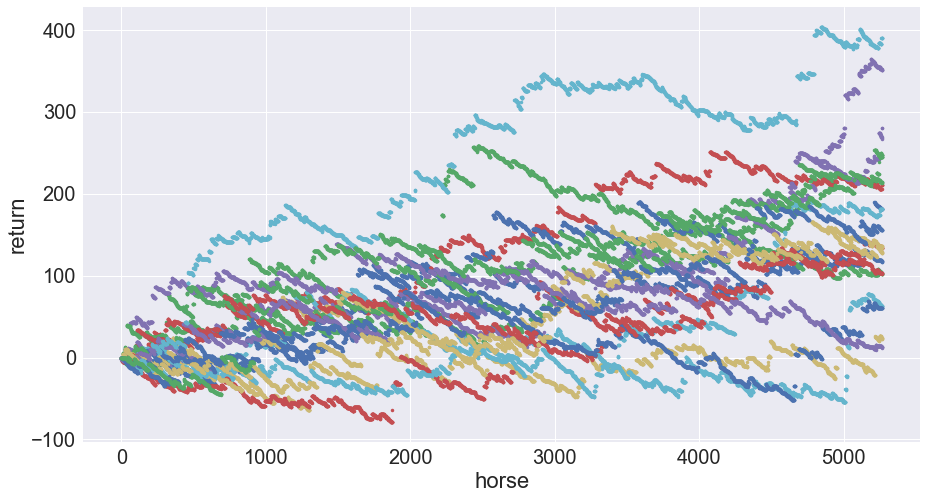

160.19879999999998
94.91688162049995


C:\Users\ivan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ivan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


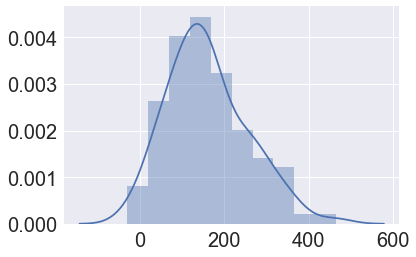

In [92]:
monte_rf_list = []
for j in range(500):
    #market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    df1 = probs.sample(frac=0.2)
    
    rf_list = []

    for i in range(len(df1)):
        
        if (0.01 < (df1.odds_diff.iloc[i]) < 0.04):
        
            reward = ((df1.BACKPRICE.iloc[i]-1) *\
                       df1.WINNER.iloc[i]) -\
                      (df1.LOSER.iloc[i])
        else:
            reward = 0

        rf_list.append(reward)

    monte_rf_list.append(rf_list)

batch_list = range(0,int(len(df1)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_rf_list[0]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[1]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[2]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[3]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[4]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[5]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[6]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[7]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[8]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[9]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[10]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[11]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[12]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[13]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[14]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[15]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[16]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[17]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[18]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[19]),   '.')




plt.rc('font', size=28)
plt.xlabel("horse")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

asd = []
for i in range(100):
    
    asd.append(np.cumsum(monte_rf_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

In [67]:
horse_count_list = []
T_list = []
EV_list0 = []


n = (probs['odds_diff'].max() - probs['odds_diff'].min())/200
for T in np.linspace(probs['odds_diff'].min(), probs['odds_diff'].max(), 400):
    
    horse_count = len(probs[(probs['odds_diff'] >= T) & (probs['odds_diff'] < T + n)])
    #horse_count_list.append(horse_count)
    
    win_prob = (probs[(probs['odds_diff'] >= T) & (probs['odds_diff'] < T+n)].WINNER.sum())/horse_count
    
    reward_list0 = []
    df1 = probs[(probs['odds_diff'] >= T) & (probs['odds_diff'] < T + n)]# & (df.BACKPRICE < 1/win_prob)]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list0.append(reward)
    horse_count_list.append(len(df1))
    EV_list0.append(np.sum(reward_list0))
    T_list.append(T)

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':


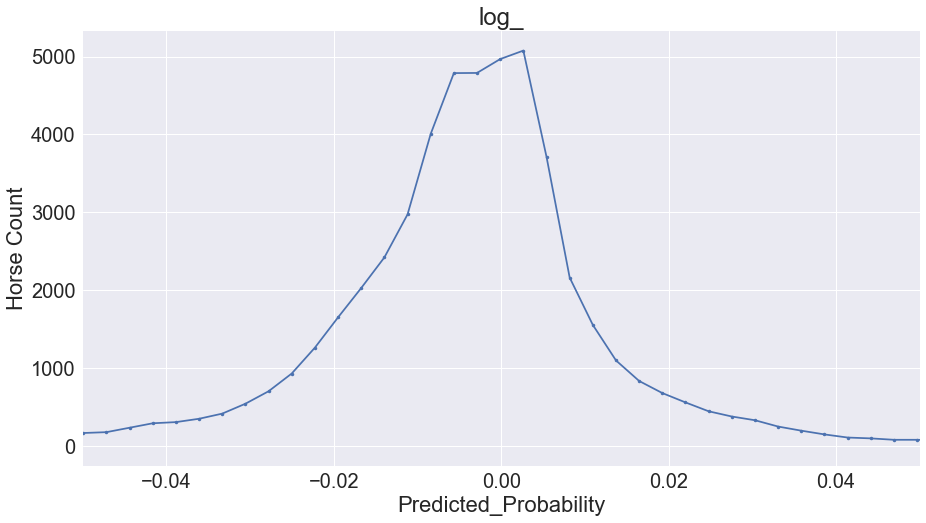

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Pred_Prob - Induced_Odds")
plt.ylabel("Horse Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

plt.xlim(-0.05,0.05)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

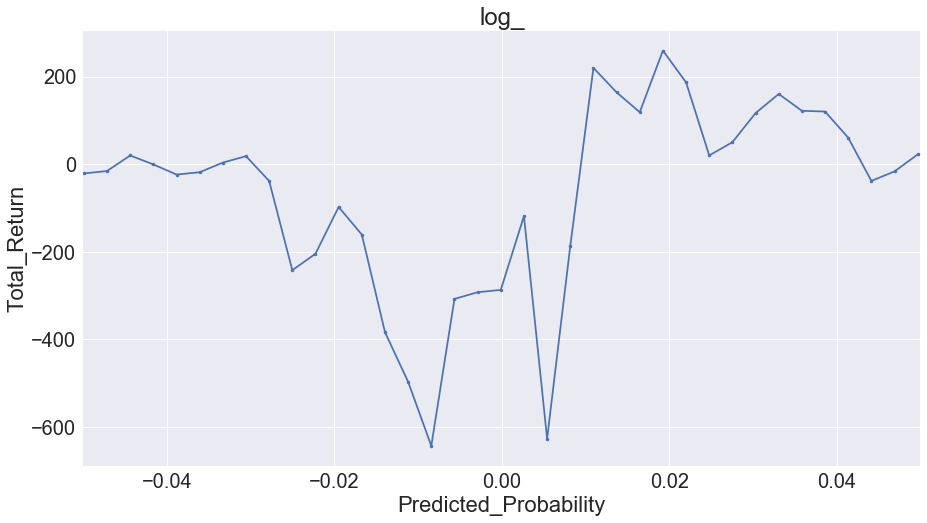

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, (EV_list0),   '.-')
plt.rc('font', size=28)
plt.xlabel("Pred_Prob - Induced_Odds")
plt.ylabel("Total_Return")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

plt.xlim(-0.05,0.05)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


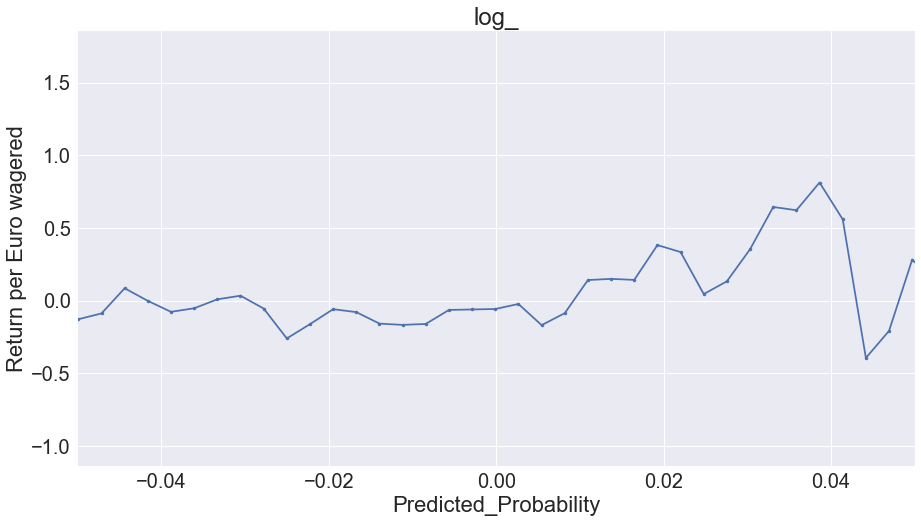

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(EV_list0, horse_count_list),   '.-')
plt.rc('font', size=28)
plt.xlabel("Pred_Prob - Induced_Odds")
plt.ylabel("Return per Euro wagered")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

plt.xlim(-0.05,0.05)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

In [343]:
win_prob_list = []
horse_count_list = []
T_list = []
backprice_list = []


n = (probs['RF_Prob'].max() - probs['RF_Prob'].min())/20
for T in np.linspace(probs['RF_Prob'].min(), probs['RF_Prob'].max(), 20):
    
    horse_count = len(probs[(probs['RF_Prob'] >= T) & (probs['RF_Prob'] < T + n) & (probs['BACKPRICE'] > 1/T)])
    horse_count_list.append(horse_count)
    
    win_prob_list.append((probs[(probs['RF_Prob'] >= T) &\
                                (probs['RF_Prob'] < T+n) &\
                                (probs['BACKPRICE'] > 1/T)].WINNER.sum())/horse_count)
    
    backprice_list.append(probs[(probs['RF_Prob'] >= T) &\
                                (probs['RF_Prob'] < T+n) &\
                                (probs['BACKPRICE'] > 1/T)].BACKPRICE.mean())


    T_list.append(T)

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


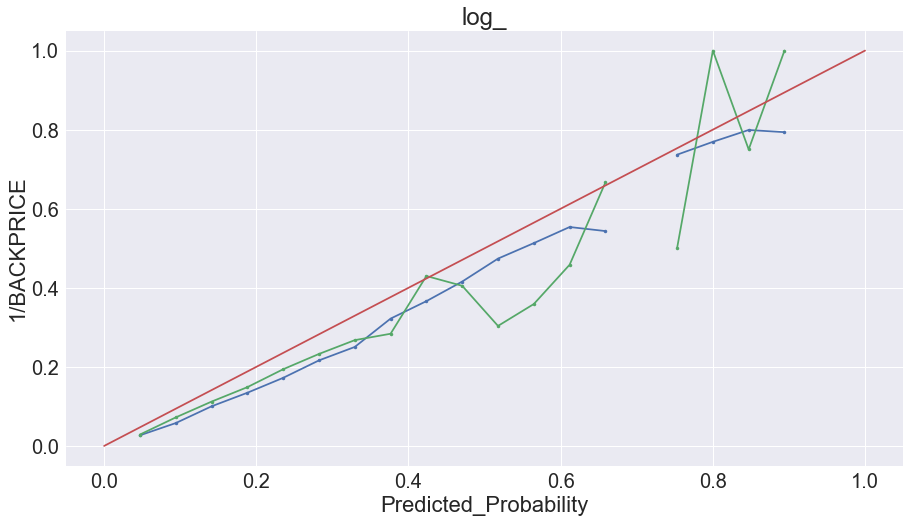

In [344]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(1,backprice_list),   '.-', label = 'induced odds')
ax.plot(T_list, win_prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("1/BACKPRICE")
_ = plt.plot([0, 1], [0, 1])
plt.title('log_')

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

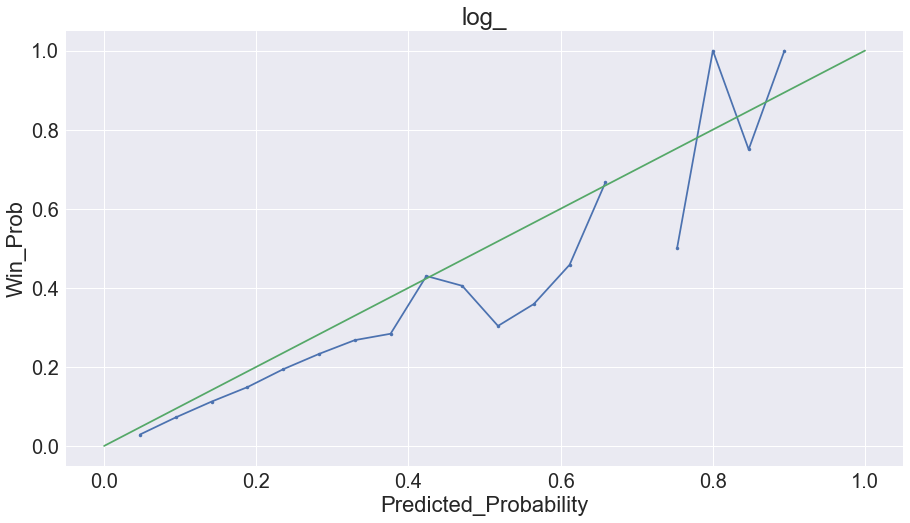

In [345]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, win_prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Win_Prob")
_ = plt.plot([0, 1], [0, 1])
plt.title('log_')

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

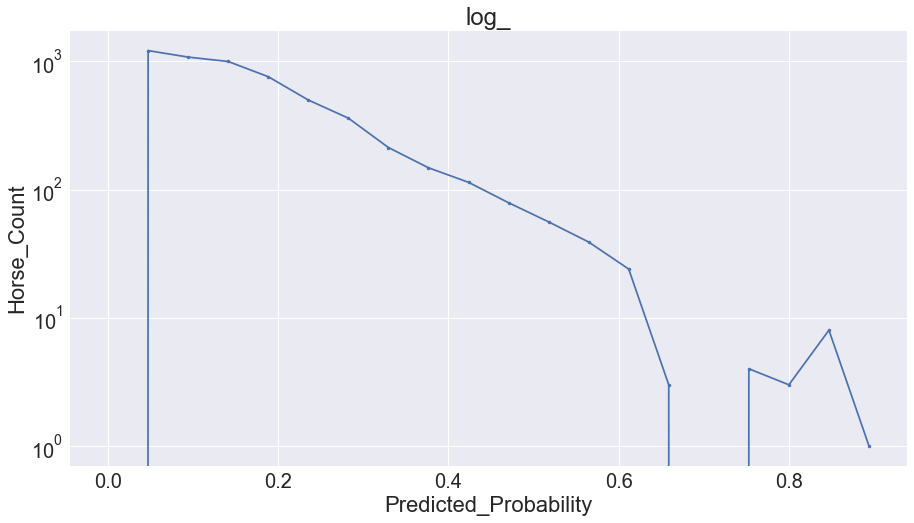

In [346]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Horse_Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

#plt.xlim(-800,500)
#plt.ylim(0,3000)
plt.yscale('log')

plt.grid(True)
plt.show()

In [347]:
win_prob_list = []
horse_count_list = []
T_list = []
backprice_list = []

n = (probs['RF_Prob'].max() - probs['RF_Prob'].min())/20
for T in np.linspace(probs['RF_Prob'].min(), probs['RF_Prob'].max(), 20):
    
    horse_count = len(probs[(probs['RF_Prob'] >= T) & (probs['RF_Prob'] < T + n) & (probs['BACKPRICE'] <= 1/T)])
    horse_count_list.append(horse_count)
    
    win_prob_list.append((probs[(probs['RF_Prob'] >= T) &\
                                (probs['RF_Prob'] < T+n) &\
                                (probs['BACKPRICE'] > 1/T)].WINNER.sum())/horse_count)
    
    backprice_list.append(probs[(probs['RF_Prob'] >= T) &\
                                (probs['RF_Prob'] < T+n) &\
                                (probs['BACKPRICE'] <= 1/T)].BACKPRICE.mean())


    T_list.append(T)

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in longlong_scalars
  if sys.path[0] == '':


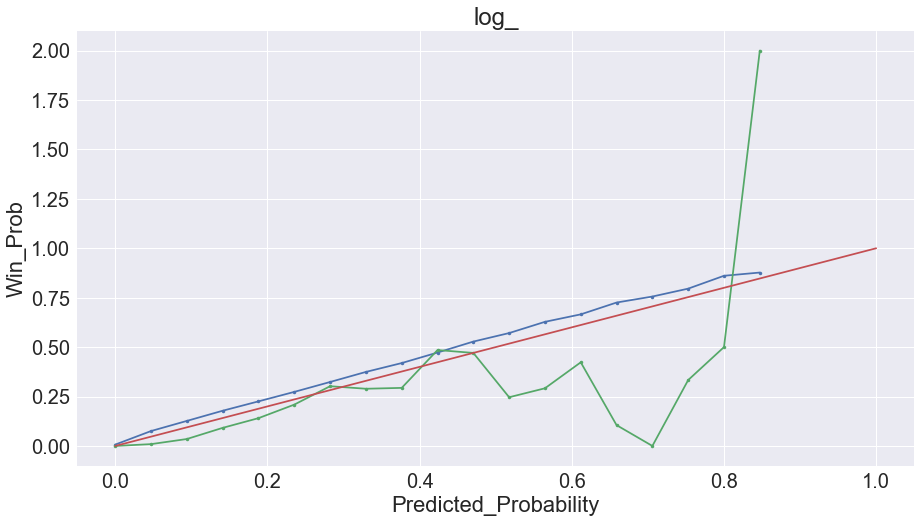

In [348]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(1,backprice_list),   '.-', label = 'induced odds')
ax.plot(T_list, win_prob_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Win_Prob")
_ = plt.plot([0, 1], [0, 1])
plt.title('log_')

#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

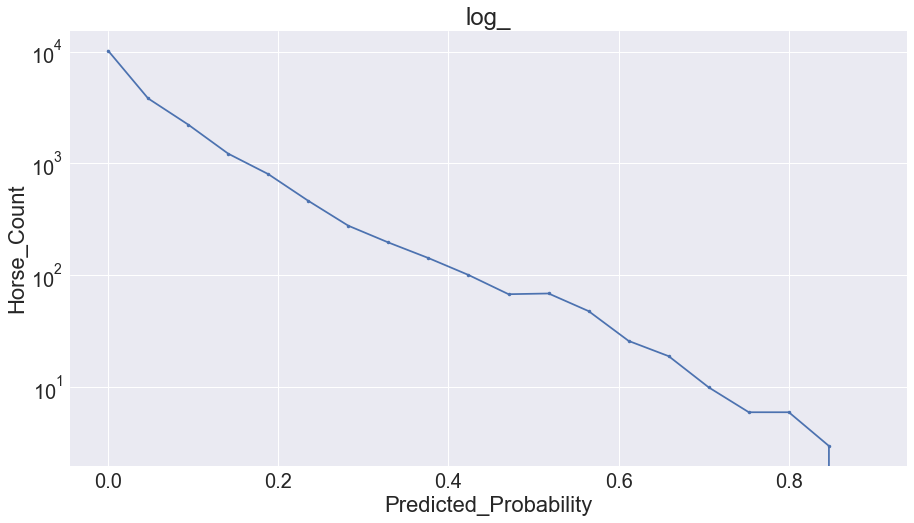

In [349]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Horse_Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

#plt.xlim(-800,500)
#plt.ylim(0,3000)
plt.yscale('log')

plt.grid(True)
plt.show()

In [355]:
horse_count_list = []
T_list = []
EV_list0 = []


n = (probs['RF_Prob'].max() - probs['RF_Prob'].min())/60
for T in np.linspace(probs['RF_Prob'].min(), probs['RF_Prob'].max(), 60):
    
    horse_count = len(probs[(probs['RF_Prob'] >= T) & (probs['RF_Prob'] < T + n)])
    #horse_count_list.append(horse_count)
    
    win_prob = (probs[(probs['RF_Prob'] >= T) & (probs['RF_Prob'] < T+n)].WINNER.sum())/horse_count
    
    reward_list0 = []
    df1 = probs[(probs['RF_Prob'] >= T) & (probs['RF_Prob'] < T + n) & (df.BACKPRICE < 1/win_prob)]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list0.append(reward)
    horse_count_list.append(len(df1))
    EV_list0.append(np.sum(reward_list0))
    T_list.append(T)

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


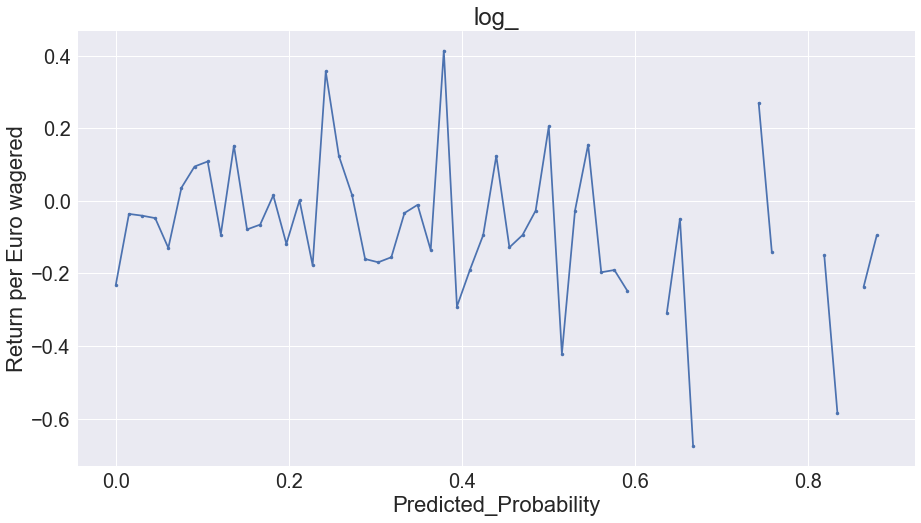

In [356]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(EV_list0, horse_count_list),   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Return per Euro wagered")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

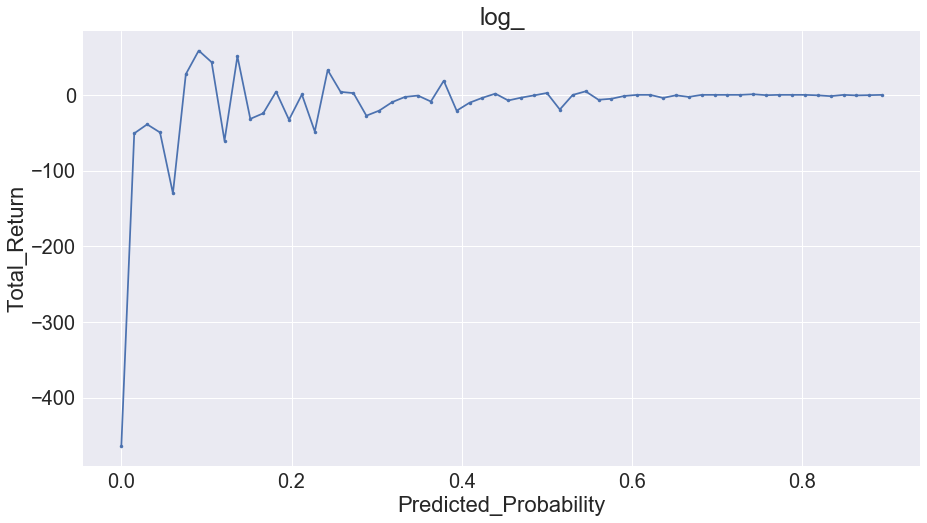

In [357]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, (EV_list0),   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Total_Return")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

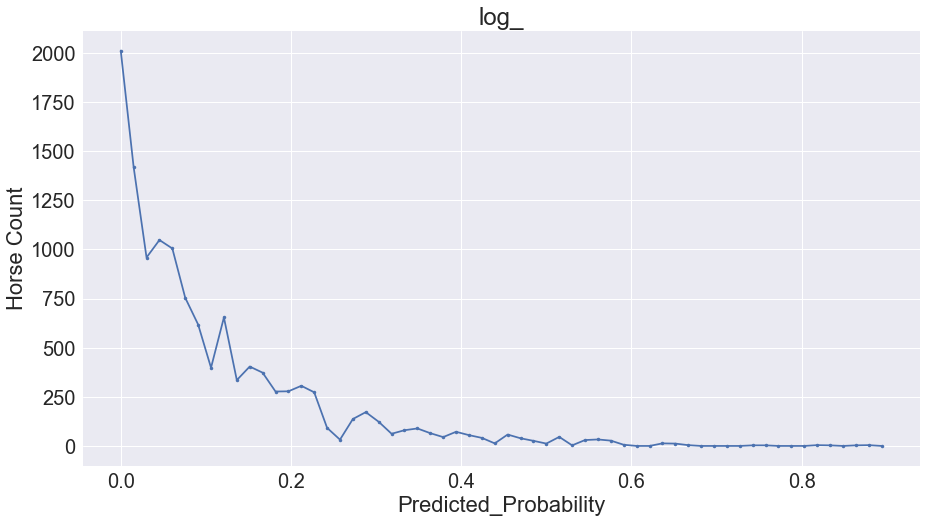

In [358]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Horse Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [359]:
print (EV_list0, 'reward sum per bin')
print ('')
print (np.sum(EV_list0), 'total reward')
print ('')
print (horse_count_list, 'wagered sum per bin')
print ('')
print (np.sum(horse_count_list), 'total wagered')
print('')
print(np.sum(EV_list0)/np.sum(horse_count_list), 'Return Per Euro')

[-464.0, -50.900000000000006, -38.999999999999986, -49.70000000000001, -130.2, 27.30000000000001, 58.5, 43.19999999999999, -60.599999999999994, 50.95, -31.75, -24.400000000000002, 4.199999999999999, -32.89999999999999, 0.4999999999999858, -48.45, 32.8, 3.9700000000000006, 2.289999999999999, -27.53, -20.800000000000004, -9.620000000000001, -2.680000000000001, -0.9699999999999989, -8.8, 18.630000000000003, -20.949999999999996, -10.4, -3.8699999999999997, 1.6099999999999999, -7.4300000000000015, -3.6700000000000017, -0.6999999999999991, 2.4600000000000004, -19.38, -0.08000000000000007, 4.65, -6.49, -5.14, -1.4900000000000002, 0.0, 0.0, -4.01, -0.5899999999999999, -2.7, 0.0, 0.0, 0.0, 0.0, 0.81, -0.41999999999999993, 0.0, 0.0, 0.0, -0.6000000000000001, -1.75, 0.0, -0.7100000000000002, -0.3800000000000001, 0.0] reward sum per bin

-841.1899999999999 total reward

[2012, 1419, 959, 1048, 1005, 754, 618, 398, 654, 335, 404, 373, 277, 278, 306, 273, 92, 32, 137, 172, 123, 62, 80, 89, 65, 45, 7

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


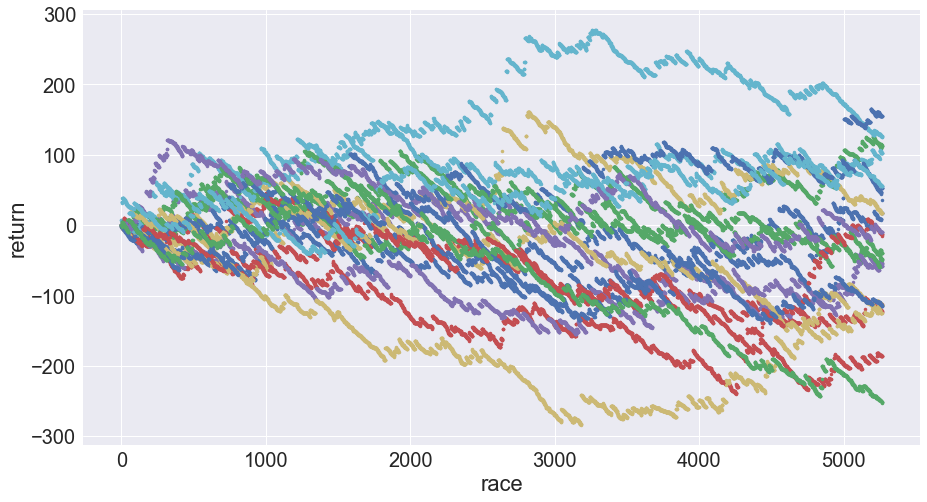

-22.109000000000005
107.32759858955195


C:\Users\ivan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ivan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


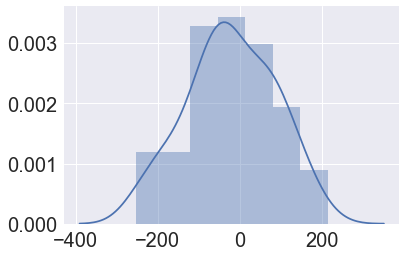

In [370]:
monte_rf_list = []
for j in range(100):
    #market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    df1 = probs.sample(frac=0.2)
    
    rf_list = []

    for i in range(len(df1)):
        
        if ((df1.BACKPRICE.iloc[i]) > (1/df1.RF_Prob.iloc[i])) & (0.05 < (df1.RF_Prob.iloc[i]) < 0.2):
        
            reward = ((df1.BACKPRICE.iloc[i]-1) *\
                       df1.WINNER.iloc[i]) -\
                      (df1.LOSER.iloc[i])
        else:
            reward = 0

        rf_list.append(reward)

    monte_rf_list.append(rf_list)

batch_list = range(0,int(len(df1)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_rf_list[0]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[1]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[2]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[3]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[4]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[5]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[6]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[7]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[8]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[9]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[10]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[11]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[12]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[13]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[14]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[15]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[16]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[17]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[18]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[19]),   '.')




plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

asd = []
for i in range(100):
    
    asd.append(np.cumsum(monte_rf_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

In [182]:
horse_count_list = []
T_list = []
EV_list0 = []


n = (probs['comb_prob'].max() - probs['comb_prob'].min())/60
for T in np.linspace(probs['comb_prob'].min(), probs['comb_prob'].max(), 60):
    
    horse_count = len(probs[(probs['comb_prob'] >= T) & (probs['comb_prob'] < T + n)])
    #horse_count_list.append(horse_count)
    
    win_prob = (probs[(probs['comb_prob'] >= T) & (probs['comb_prob'] < T+n)].WINNER.sum())/horse_count
    
    reward_list0 = []
    df1 = probs[(probs['comb_prob'] >= T) & (probs['comb_prob'] < T + n) & (df.BACKPRICE < 1/win_prob)]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list0.append(reward)
    horse_count_list.append(len(df1))
    EV_list0.append(np.sum(reward_list0))
    T_list.append(T)

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


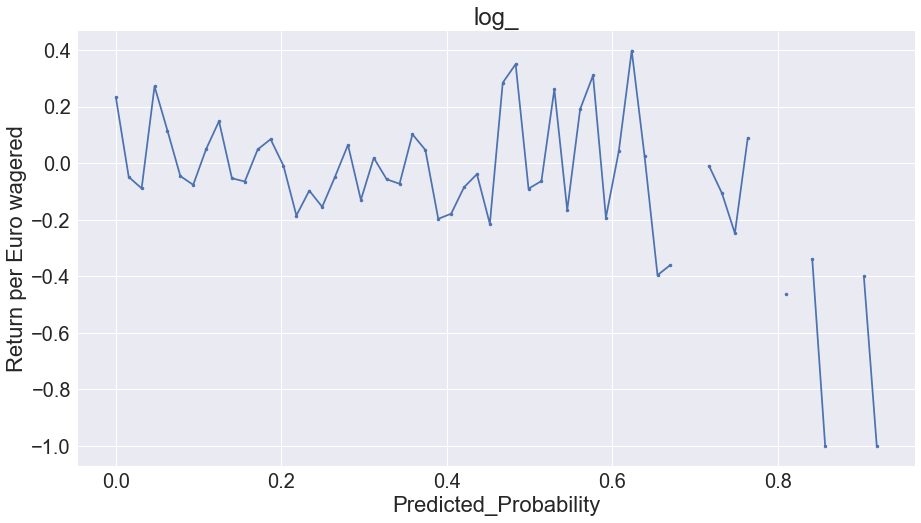

In [183]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(EV_list0, horse_count_list),   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Return per Euro wagered")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

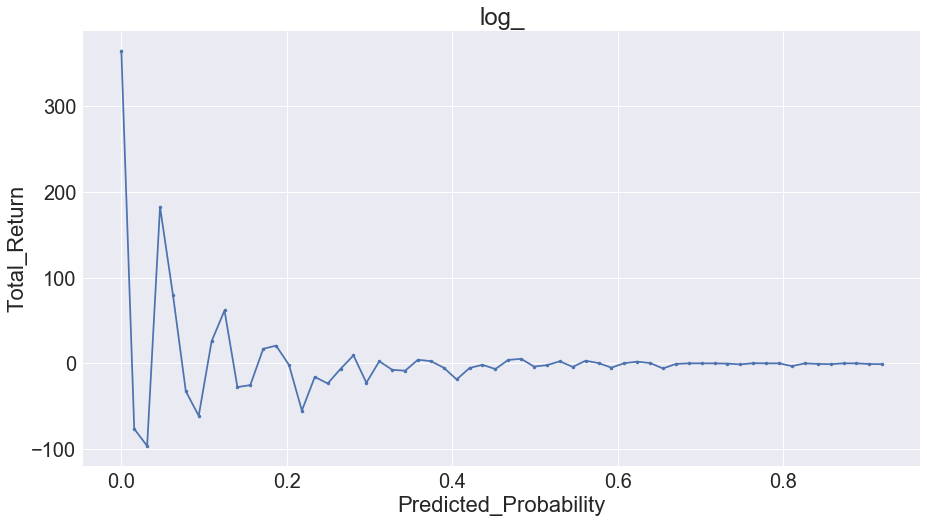

In [184]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, (EV_list0),   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Total_Return")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

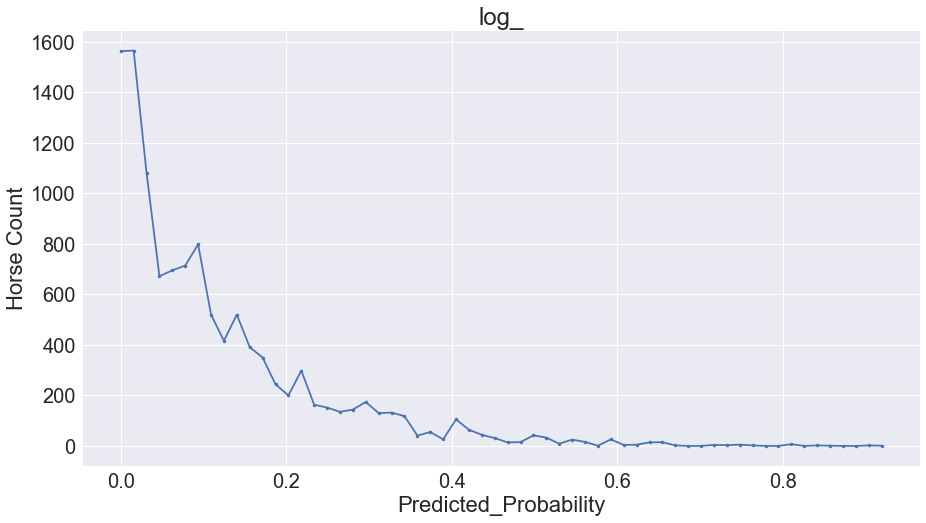

In [185]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Horse Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

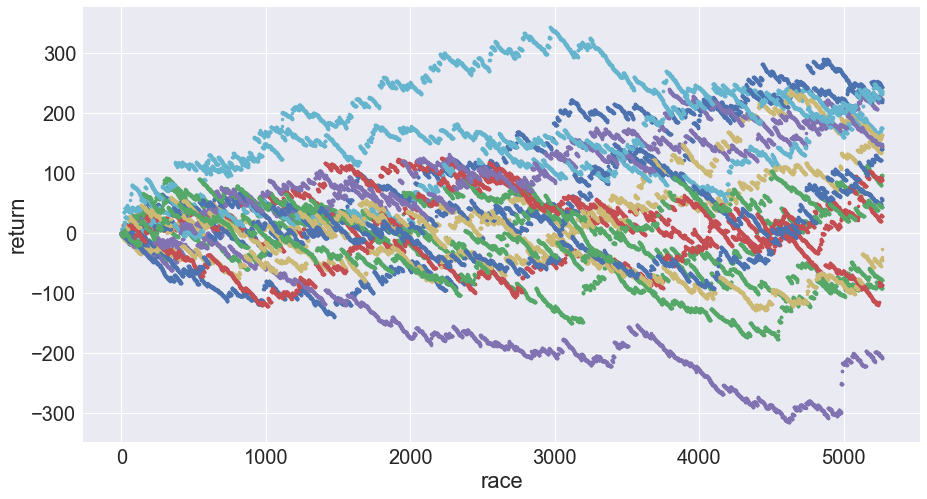

9.390999999999998
126.18716265531927


C:\Users\ivan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ivan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


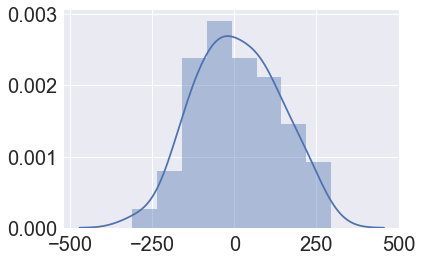

In [187]:
monte_rf_list = []
for j in range(100):
    #market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    df1 = probs.sample(frac=0.2)
    
    rf_list = []

    for i in range(len(df1)):
        
        if ((df1.BACKPRICE.iloc[i]) > (1/df1.comb_prob.iloc[i])) & (0.05 < (df1.comb_prob.iloc[i]) < 0.2):
        
            reward = ((df1.BACKPRICE.iloc[i]-1) *\
                       df1.WINNER.iloc[i]) -\
                      (df1.LOSER.iloc[i])
        else:
            reward = 0

        rf_list.append(reward)

    monte_rf_list.append(rf_list)

batch_list = range(0,int(len(df1)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_rf_list[0]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[1]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[2]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[3]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[4]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[5]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[6]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[7]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[8]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[9]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[10]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[11]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[12]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[13]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[14]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[15]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[16]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[17]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[18]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[19]),   '.')




plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

asd = []
for i in range(100):
    
    asd.append(np.cumsum(monte_rf_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)

In [316]:
horse_count_list = []
T_list = []
EV_list0 = []


n = (probs['odds_diff'].max() - probs['odds_diff'].min())/80
for T in np.linspace(probs['odds_diff'].min(), probs['odds_diff'].max(), 80):
    
    horse_count = len(probs[(probs['odds_diff'] >= T) & (probs['odds_diff'] < T + n)])
    #horse_count_list.append(horse_count)
    
    win_prob = (probs[(probs['odds_diff'] >= T) & (probs['odds_diff'] < T+n)].WINNER.sum())/horse_count
    
    reward_list0 = []
    df1 = probs[(probs['odds_diff'] >= T) & (probs['odds_diff'] < T + n) & (df.BACKPRICE < 1/win_prob)]
    for j in range(len(df1)):
        
        if (df1.iloc[j].WINNER) == 1:
            reward = (df1.iloc[j].BACKPRICE-1)

        else:
            reward = -1


        reward_list0.append(reward)
    horse_count_list.append(len(df1))
    EV_list0.append(np.sum(reward_list0))
    T_list.append(T)

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to 

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWar

C:\Users\ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


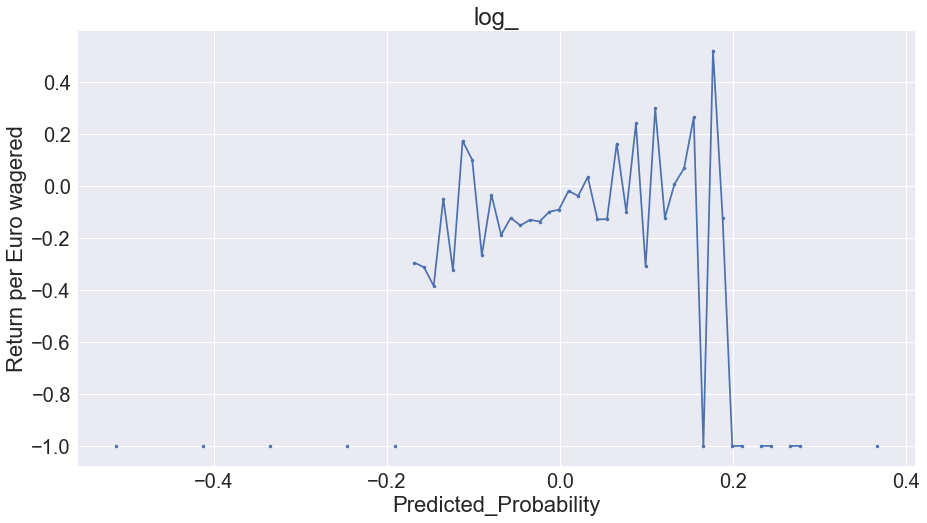

In [317]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, np.divide(EV_list0, horse_count_list),   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Return per Euro wagered")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

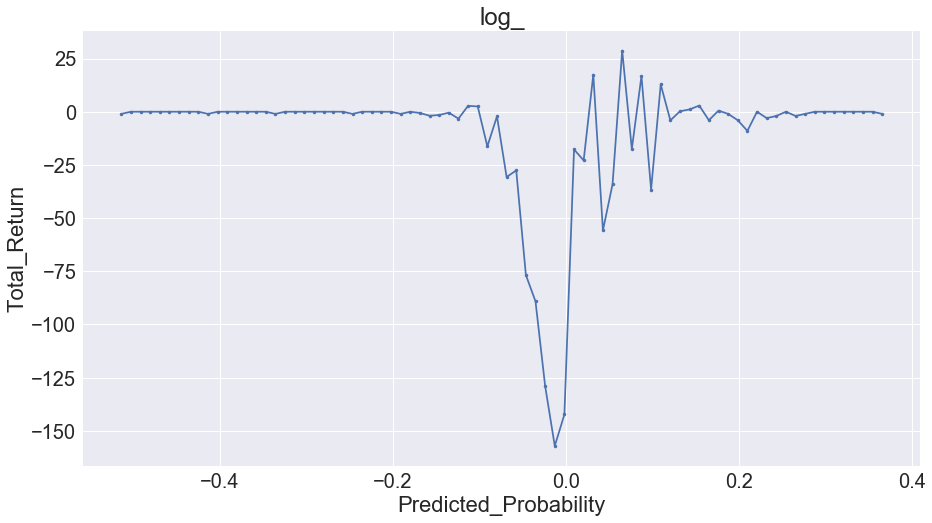

In [318]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, (EV_list0),   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Total_Return")
#_ = plt.plot([0, 9], [0, 0])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(-0.5,0.4)

plt.grid(True)
plt.show()

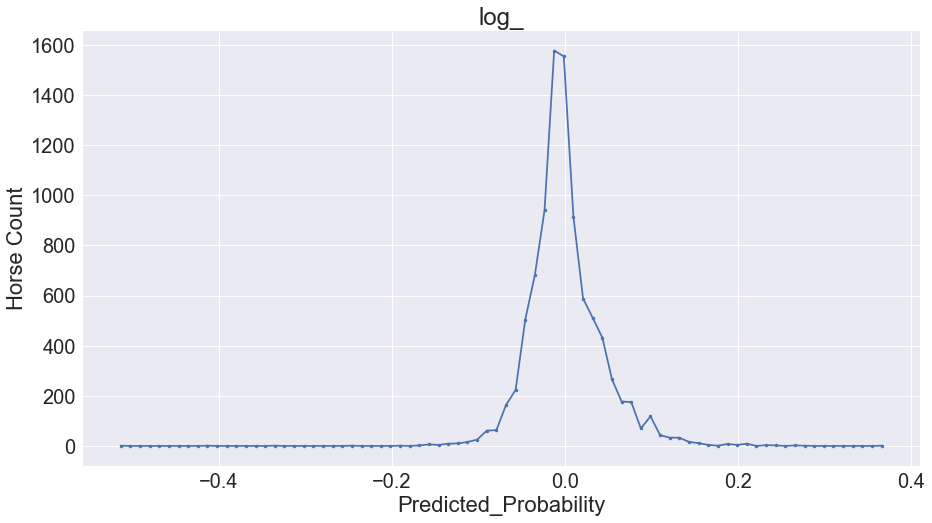

In [319]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)
ax.plot(T_list, horse_count_list,   '.-')
plt.rc('font', size=28)
plt.xlabel("Predicted_Probability")
plt.ylabel("Horse Count")
#_ = plt.plot([0, len(batch_list)], [1, 1])
plt.title('log_')

#plt.xlim(-1,9)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

In [320]:
i = 43

print (EV_list0[i])
print (T_list[i])
print ('')

i = 44

print (EV_list0[i])
print (T_list[i])

-89.13
-0.03479880498351101

-128.92
-0.023663490729886716


In [321]:
i = 49

print (EV_list0[i])
print (T_list[i])
print ('')

i = 55

print (EV_list0[i])
print (T_list[i])

17.450000000000003
0.032013080538234484

-36.580000000000005
0.09882496605997992


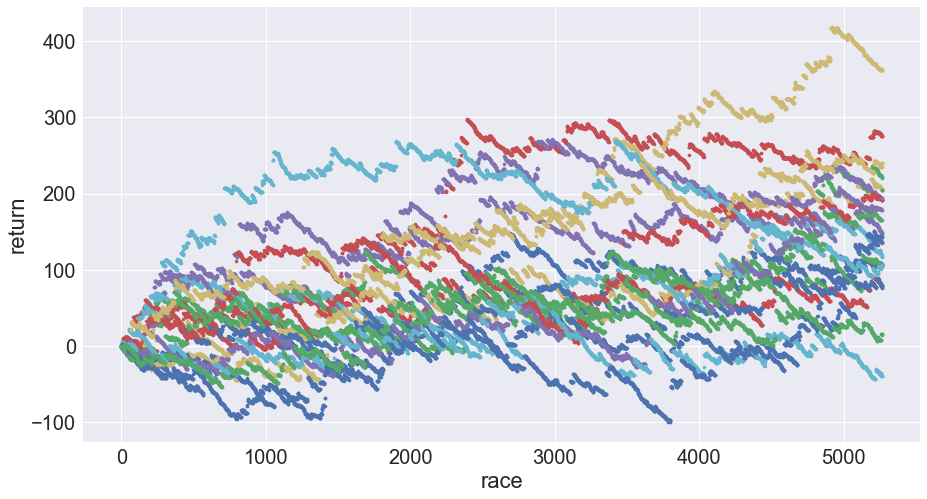

140.6455
118.29405630356075


C:\Users\ivan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ivan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


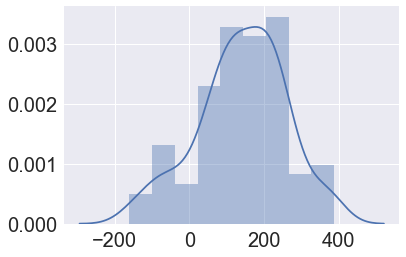

In [228]:
monte_rf_list = []
for j in range(100):
    #market_list = df1.groupby('MARKETID').RUNNER_NAME.count().index.tolist()
    df1 = probs.sample(frac=0.2)
    
    rf_list = []

    for i in range(len(df1)):
        
        if (T_list[43] < (df1.odds_diff.iloc[i]) < T_list[44]) | (T_list[49] < (df1.odds_diff.iloc[i]) < T_list[55]):
        
            reward = ((df1.BACKPRICE.iloc[i]-1) *\
                       df1.WINNER.iloc[i]) -\
                      (df1.LOSER.iloc[i])
        else:
            reward = 0

        rf_list.append(reward)

    monte_rf_list.append(rf_list)

batch_list = range(0,int(len(df1)))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8, forward=True)

ax.plot(batch_list, np.cumsum(monte_rf_list[0]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[1]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[2]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[3]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[4]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[5]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[6]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[7]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[8]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[9]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[10]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[11]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[12]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[13]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[14]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[15]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[16]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[17]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[18]),   '.')
ax.plot(batch_list, np.cumsum(monte_rf_list[19]),   '.')




plt.rc('font', size=28)
plt.xlabel("race")
plt.ylabel("return")
#_ = plt.plot([0, len(batch_list)], [1, 1])


#plt.xlim(-800,500)
#plt.ylim(0,3000)

plt.grid(True)
plt.show()

asd = []
for i in range(100):
    
    asd.append(np.cumsum(monte_rf_list[i])[-1])

print (np.mean(asd))
print (np.std(asd))

sns.distplot(asd)